# [**347. 前 K 个高频元素**](https://leetcode-cn.com/problems/top-k-frequentelements/)
给定一个非空的整数数组，返回其中出现频率前 k 高的元素。

 

示例 1:

输入: nums = [1,1,1,2,2,3], k = 2
输出: [1,2]
示例 2:

输入: nums = [1], k = 1
输出: [1]
 

提示：

你可以假设给定的 k 总是合理的，且 1 ≤ k ≤ 数组中不相同的元素的个数。
你的算法的时间复杂度必须优于 O(n log n) , n 是数组的大小。
题目数据保证答案唯一，换句话说，数组中前 k 个高频元素的集合是唯一的。
你可以按任意顺序返回答案。

In [ ]:
class Solution:
    def topKFrequent(self, nums, k):
        d = collections.Counter(nums)
        nums = list(d.values())
        a, b = min(nums), max(nums)
        if a == b:
            return list(d.keys())
        nums = list(d.items())
        t = len(nums) // k + 1
        size = (b - a) / t
        l = [[] for i in range(t+1)]
        for i in nums:
            l[t - round((i[1] - a)//size)].append(i)
        n = t = 0
        while n < k:
            n += len(l[t])
            t += 1
        r = []
        for i in l[:t-1]:
            r += i
        if n == k:
            r += l[t-1]
        else:
            r1 = l[t-1]
            r1.sort(key=lambda x:x[1])
            r += r1[n-k:]
        return [i[0] for i in r]



- 桶排序
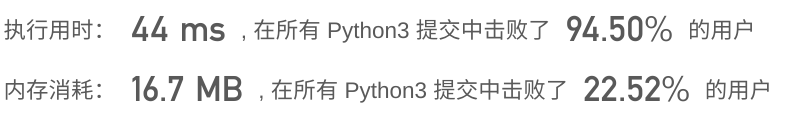

In [ ]:
class Solution:
    def topKFrequent(self, nums, k):
        d = collections.Counter(nums)
        r = []
        count = 0
        def sort(num, i, j):
            k = (i+j)//2
            rk = r[k][1]
            if rk > num:
                if i == k:
                    return i+1
                return sort(num, k, j)
            elif rk < num:
                if i == k:
                    return k
                return sort(num, i, k)
            else:
                return k
        for i, t in d.items():
            end = min(k, len(r))
            if end:
                if t > r[0][1]:
                    r.insert(0, (i, t))
                    continue
                elif t < r[end-1][1]:
                    if end < k:
                        r.append((i, t))
                    continue
                p = sort(t, 0, end-1)
                if p < k:
                    r.insert(p, (i, t))
            else:
                r.append((i, t))
        return [i[0] for i in r[:k]]



- 二分排序
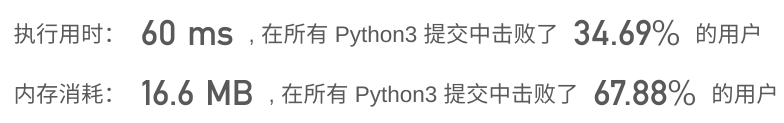

In [ ]:
class Solution:
    def topKFrequent(self, nums, k):
        nums = list(collections.Counter(nums).items())
        def sort(nums, k):
            l = len(nums)
            if l == k:
                return nums
            mid = nums.pop(k)
            left, right = [], []
            l = 0
            for i in nums:
                if i[1] < mid[1]:
                    left.append(i)
                else:
                    right.append(i)
                    l += 1
            if l > k:
                return sort(right, k)
            elif l == k:
                return right
            elif l == k - 1:
                return right + [mid]
            else:
                return right + [mid] + sort(left, k -l - 1)
        return [i[0] for i in (sort(nums, k) if len(nums) > k else nums)]



- 快排
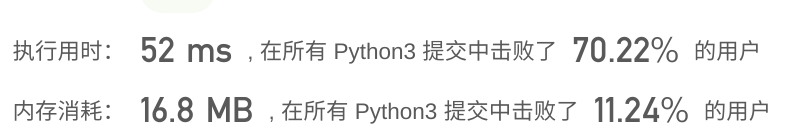